# Wine Project - Finding Drivers Of Wine Quality

# Goal

- Identify Key Features: Determine the features within the dataset that exhibit strong relationship with quality of wine.
- Build Predictive Model: Develop a model that can accurately predict wine quality based on the selected features utilizing clusters

- Share Insights: Communicate the findings and model insights to the California Wine Institute data science team   supply chain marketing. for further analysis and decision-making.



# Import

In [1]:
#import libraries
import wrangle_wine as w
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import explore as e
import model as m 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Acquire


- Data acquired from Data.World Wine Quality Dataset(https://data.world/food/wine-quality/activity)
- Data set has 13 columns and 6,497 rows before cleaning
- Each row represents a unique wine
- Each column represents wine feature


## Data Preview


In [2]:
df = w.wine_merge_data()

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,strain
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [5]:
df.strain.value_counts()

white    4898
red      1599
Name: strain, dtype: int64

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
strain                  0
dtype: int64

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

In [9]:
numeric_columns.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#  Prepare

### Prepare Actions:

- Renamed columns to promote readability
- Checked for nulls in the data, there are no nulls
- Data type didin't need adjustments
- Outliers  removed
- Encode categorical variables
- Split data into train, validate and test (approx. 50/30/20)
- Added column strain , which identifies if the wine is red or white

- Scaled appropriate features



## Data Dictionary  



### Data Used
---

| Attribute           | Definition                                      | Data Type |
|---------------------|-------------------------------------------------|-----------|
| fixed acidity       | Amount of non-volatile acids in a substance    | float     |
| volatile acidity    | Amount of volatile acids in a substance        | float     |
| citric acid         | Amount of citric acid in a substance           | float     |
| residual sugar      | Amount of residual sugar in a substance        | float     |
| chlorides           | Concentration of chlorides in a substance      | float     |
| free sulfur dioxide | Level of free sulfur dioxide in a substance    | float     |
| total sulfur dioxide| Total sulfur dioxide content in a substance    | float     |
| density             | The density of a substance                     | float     |
| pH                  | The pH level of a substance                    | float     |
| sulphates           | Amount of sulfates in a substance              | float     |
| proof               | Twice the percentage of alcohol by volume      | float     |
| quality             | The quality rating of a substance              | float     |
| strain              | Type of wine                                   | object    |

-  This data dictionary provides a clear description of each attribute, its definition, and the data type associated with each attribute. The data types are represented as "float" for numerical values and "object" for categorical values.

## Split Data

In [2]:
# split data into train, validate and test
train, validate, test = w.wrangle_wine()

In [3]:
# this previews the training data
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,quality_bin,strain_red,strain_white
3337,7.5,0.15,0.38,1.8,0.054,19.0,101.0,0.99460,3.24,0.44,10.0,5,white,0,0,1
2609,7.6,0.16,0.44,1.4,0.043,25.0,109.0,0.99320,3.11,0.75,10.3,6,white,0,0,1
5238,6.7,0.13,0.32,3.7,0.017,32.0,99.0,0.99348,3.12,0.44,10.0,6,white,0,0,1
3985,6.9,0.30,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9,4,white,0,0,1
1399,7.2,0.67,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6,red,0,1,0


In [4]:
#splits into scaled data
train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test)

In [5]:
# previews train scaled data
train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,quality_bin,strain_red,strain_white
3337,0.305785,0.052209,0.228916,0.018405,0.067002,0.123711,0.315091,0.144399,0.393701,0.125000,0.289855,5,white,0,0,1
2609,0.314050,0.060241,0.265060,0.012270,0.048576,0.164948,0.341625,0.117409,0.291339,0.301136,0.333333,6,white,0,0,1
5238,0.239669,0.036145,0.192771,0.047546,0.005025,0.213058,0.308458,0.122807,0.299213,0.125000,0.289855,6,white,0,0,1
3985,0.256198,0.172691,0.174699,0.010736,0.065327,0.158076,0.606965,0.125506,0.433071,0.181818,0.275362,4,white,0,0,1
1399,0.280992,0.469880,0.000000,0.024540,0.090452,0.061856,0.059701,0.163678,0.535433,0.284091,0.449275,6,red,0,1,0


## Data Summary

In [6]:
# provides a quick description of the data
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,quality_bin,strain_red,strain_white
count,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000
mean,7.185347,0.343679,0.312843,5.057033,0.056383,30.046828,113.733635,0.994528,3.230232,0.533118,10.544480,5.797919,0.185633,0.253441,0.746559
std,1.292829,0.166998,0.147245,4.546493,0.036324,17.296293,55.913432,0.002971,0.161362,0.148498,1.187491,0.872755,0.388875,0.435054,0.435054
min,3.800000,0.085000,0.000000,0.600000,0.014000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,3.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,74.500000,0.992300,3.120000,0.430000,9.500000,5.000000,0.000000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994600,3.220000,0.510000,10.300000,6.000000,0.000000,0.000000,1.000000
75%,7.700000,0.410000,0.390000,7.400000,0.066000,41.000000,153.000000,0.996730,3.340000,0.600000,11.400000,6.000000,0.000000,1.000000,1.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,146.500000,307.500000,1.038980,4.010000,1.980000,14.900000,9.000000,1.000000,1.000000,1.000000


# Explore

- Performed several operations to understand the basic properties of our dataset
- Verified the integrity of our data 
- Performed preliminary analysis on some categorical features



## Data Integrity
- Checked training data for any duplicate entries using train.duplicated().value_counts()
- The result 'False' - 2979 suggests no duplicate entries in training dataset
- This is important as duplicate data can skew the results of analysis and the performance of our model.

In [16]:
train.duplicated().value_counts()

False    2979
dtype: int64

## Strain Distribution

- Analyzed distribution of 'strain' in our dataset
- Using train.strain.value_counts(), we found that there are two categories, 'white' and 'red'. - White wine samples had 2224 entries, while red wine samples count 755.
- Confirm that our scaling process would'nt modify this distribution
- We found that the distribution remained the same
- Ensure scaling  wont alter the count of categorical variables



In [17]:
train.strain.value_counts()

white    2224
red       755
Name: strain, dtype: int64

In [18]:
train_scaled.strain.value_counts()

white    2224
red       755
Name: strain, dtype: int64

In [7]:
# assign data frame to df variable
df = train

## Data Visualizations
- Evaluate patterns, correlations, and outliers in the data through visualizations
- Distribution of wine quality or the correlation of wine quality will be provided 
-  Plotting libraries such as Matplotlib, Seaborn, or Plotly are utilized



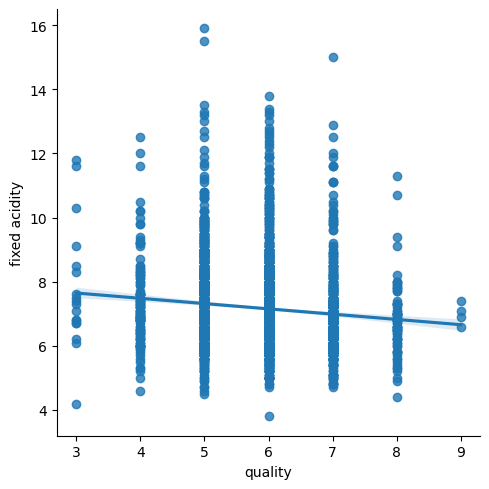

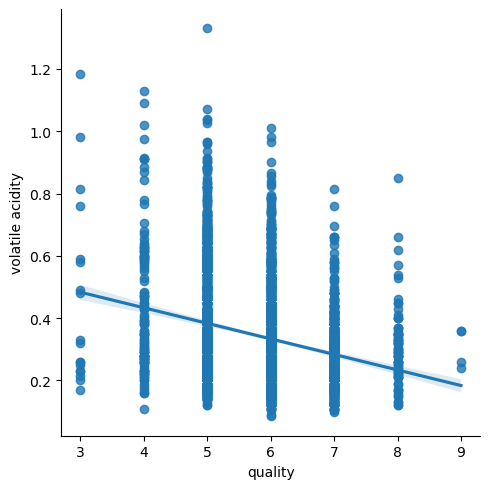

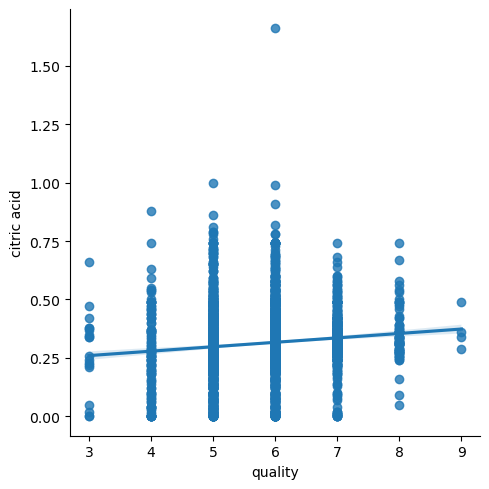

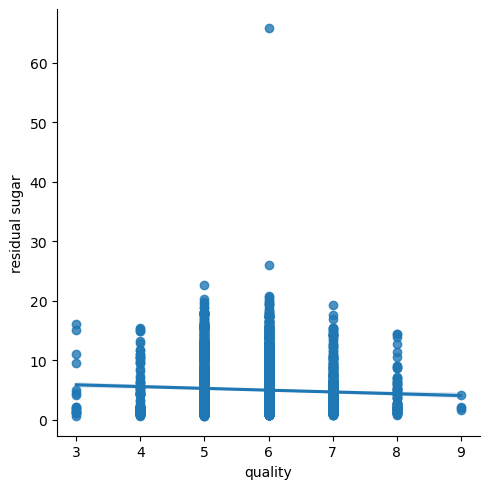

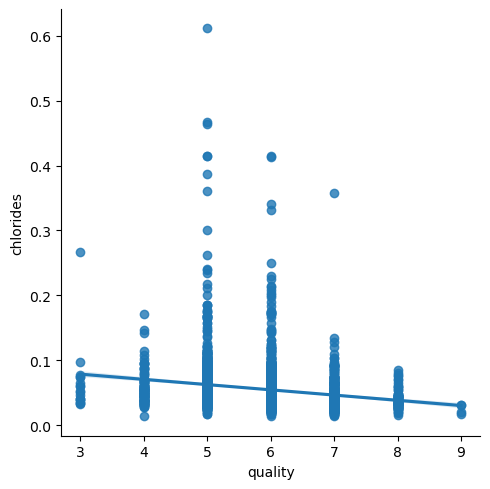

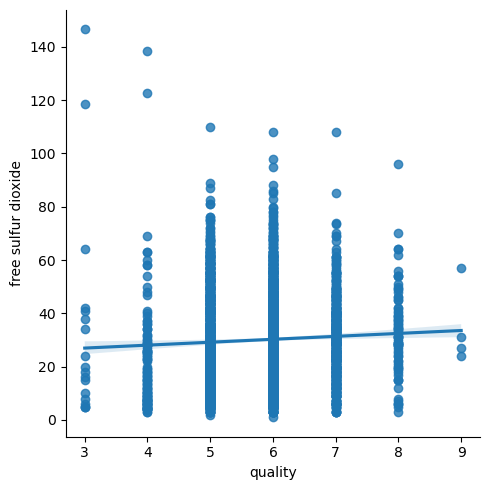

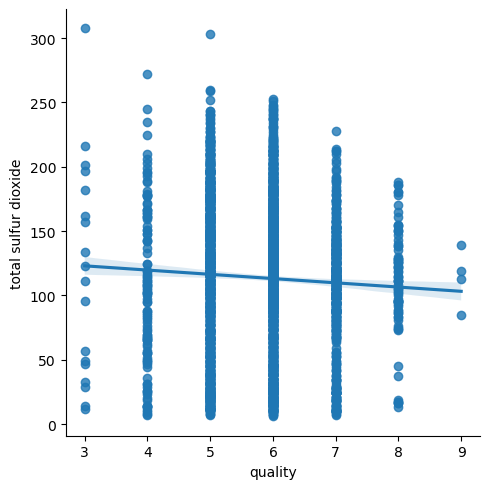

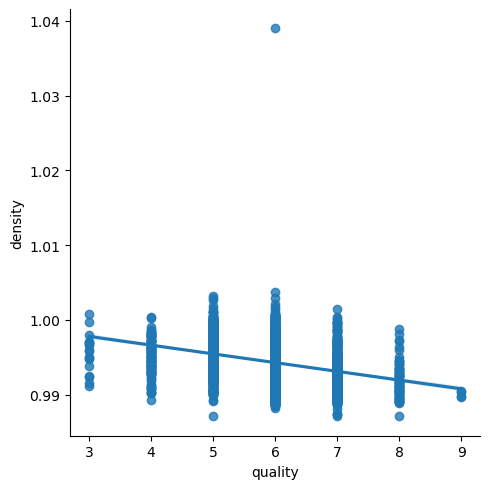

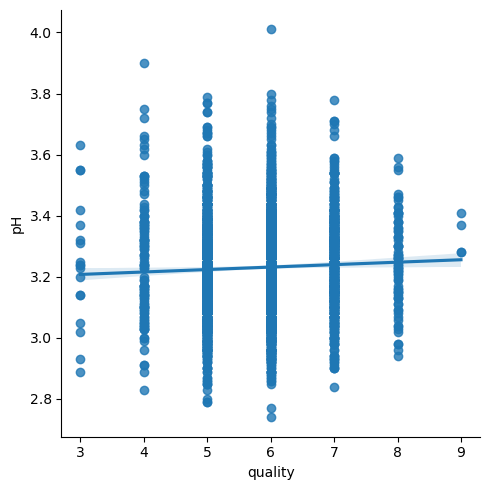

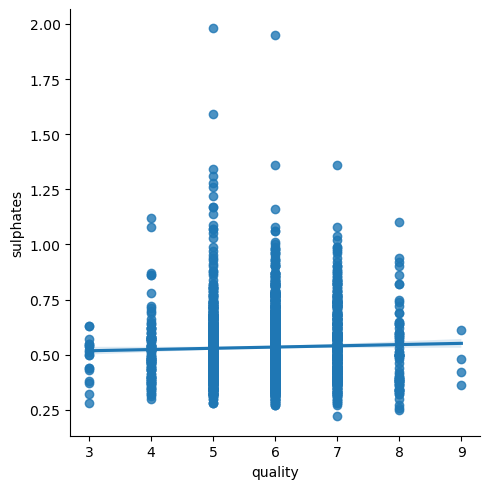

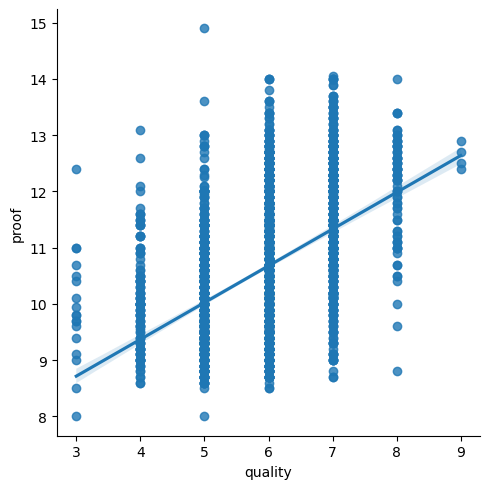

In [20]:
e.plot_variable_pairs(train)

- The charts shows all of the wine features vs wine quality
- From the visuals it does seem as there may be drivers for quality which include: strain, proof, sulphates, free sulphur dioxide, chlorides, citric acid, volatile acid and fixed acidity.
- Let's take a better look 


Text(0.5, 1.0, 'Heat Plot')

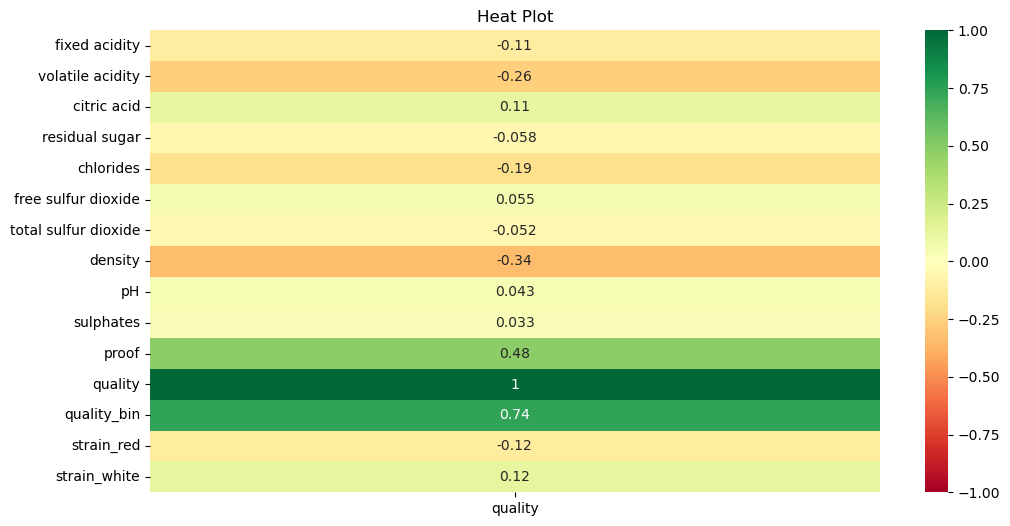

In [8]:
# The resulting heatmap provides a graphical representation of the correlation coefficients between 'quality' and all other columns in the 'train' DataFrame.

plt.figure(figsize=(40, 6))


plt.subplot(132)
sns.heatmap(train.corr()[['quality']], cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True,)
plt.title('Heat Plot')

**The three features we identified - proof, citric acid, and free sulfur dioxide - are indeed significant drivers of wine quality, based on your findings.** 

- **Proof:** This is twice the percentage of alcohol by volume. The relationship between alcohol content and wine quality is well-documented. Higher alcohol content is often associated with better quality wines because it can enhance the perceived taste and aroma.

- **Citric Acid:** This is one of the main acids found in grapes. It contributes to the acidity and freshness of the wine. A balance of citric acid can make a wine taste lively and crisp, while an excess can lead to sourness. Therefore, the right amount of citric acid can influence the quality of the wine positively.

- **Free Sulfur Dioxide:** This is a preservative that's widely used in winemaking because of its antioxidant and antibacterial properties. It helps in maintaining the color and preventing oxidation, thereby enhancing the wine's overall quality. However, excessive amounts can lead to unwanted flavors.

**These findings highlight the multifaceted nature of wine quality, with factors related to both the raw ingredients (grapes) and the winemaking process playing important roles. To build a robust predictive model, it's important to consider these variables due to their medium to high correlation with the wine quality.**

## Stats Testing Selected Features Using PearsonsR

### Is proof correlated with the wine's quality?

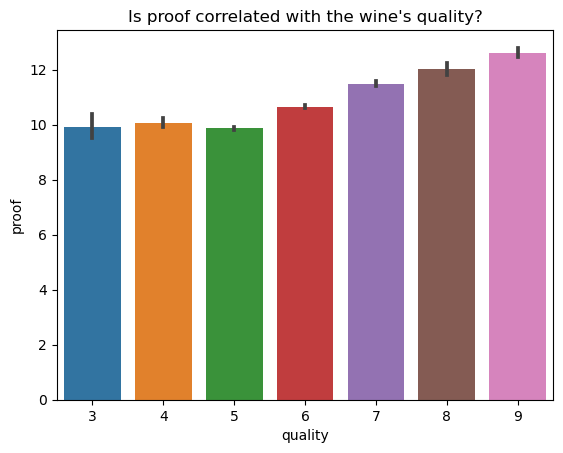

In [9]:
sns.barplot(x=train.quality, y=train.proof)
plt.title("Is proof correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("proof")
plt.show()

- As proof of the wine increases so does the quality
- The highest concentration of wines with a quality rating of 8 or 9 is for the 12.5% ABV proof
- There are a few outliers in the data
- Wines with too low a proof and those with too high if proof quality ratings trend lower


#### Pearsons R test is used to investigate whether proof and quality of the wine are correlated.

- Confidence interval of 95% used
- Resulting alpha is .05
#### $H_{0}$: proof and quality are not correlated.
#### $H_{a}$: proof and quality are correlated.

In [10]:
# sets alpha
alpha = 0.05
proof = train['proof']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.4806700681237368
p-value:  4.439061886953334e-172


In [11]:
p_value < alpha

True

####  We reject the null hypothesis

### Is citric acid correlated with the wine's quality?

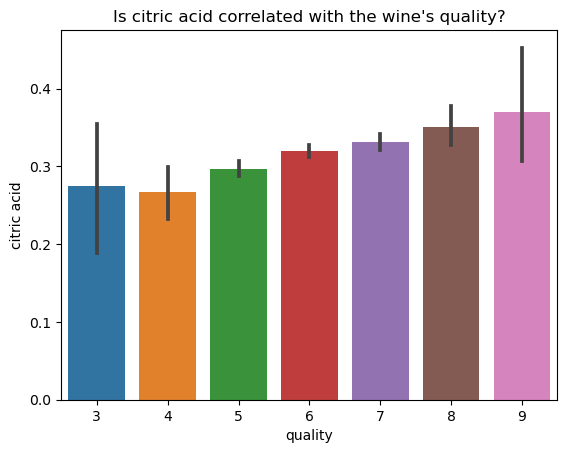

In [12]:
sns.barplot(x=train.quality, y=train['citric acid'])
plt.title("Is citric acid correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()

- The chart shows the relationship between the concentration of citric acid and the quality of wine.
- There is a positive correlation between the concentration of citric acid and the quality of wine.
- Wines with higher concentrations of citric acid tend to have higher quality scores.

#### Pearsons R test is used to investigate whether citric acid and quality of the wine are correlated.

- Confidence interval of 95% used
- Resulting alpha is .05
#### $H_{0}$: citric acid and quality are not correlated.

#### $H_{a}$: citric acid and quality are correlated.

In [13]:
# sets alpha
alpha = 0.05
proof = train['citric acid']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.11225955145615578
p-value:  8.046463019989137e-10


In [14]:
p_value < alpha

True

#### We can reject the null hypothesis

### Is free sulfur dioxide correlated with the wine's quality?

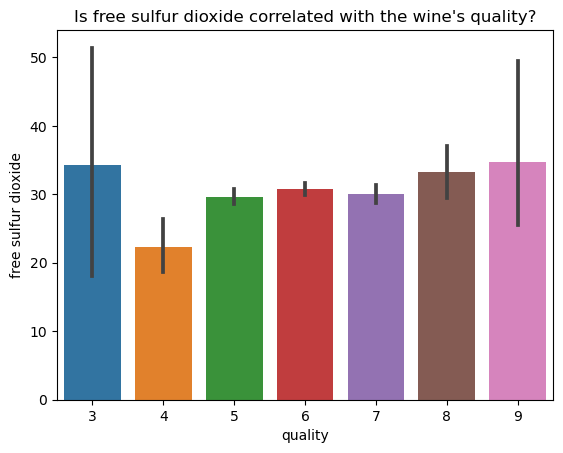

In [15]:
sns.barplot(x=train.quality, y=train['free sulfur dioxide'])
plt.title("Is free sulfur dioxide correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")
plt.show()

- The chart shows that there is a negative correlation between the concentration of free sulfur dioxide and the quality of wine.
- Wines with lower concentrations of free sulfur dioxide tend to have higher quality scores.


#### Pearsons R test is used to investigate whether proof and quality of the wine are correlated.

- Confidence interval of 95% used
- Resulting alpha is .05

#### $H_{0}$: free sulfur dioxide and quality are not correlated.
#### $H_{a}$: free sulfur dioxide and quality are correlated.

In [16]:
# sets alpha
alpha = 0.05
proof = train['free sulfur dioxide']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.055471815658097244
p-value:  0.0024558802131494175


In [17]:
p_value < alpha

True

## Finding the best k= for clustering

In [ ]:
X = train[['proof', 'citric acid']]

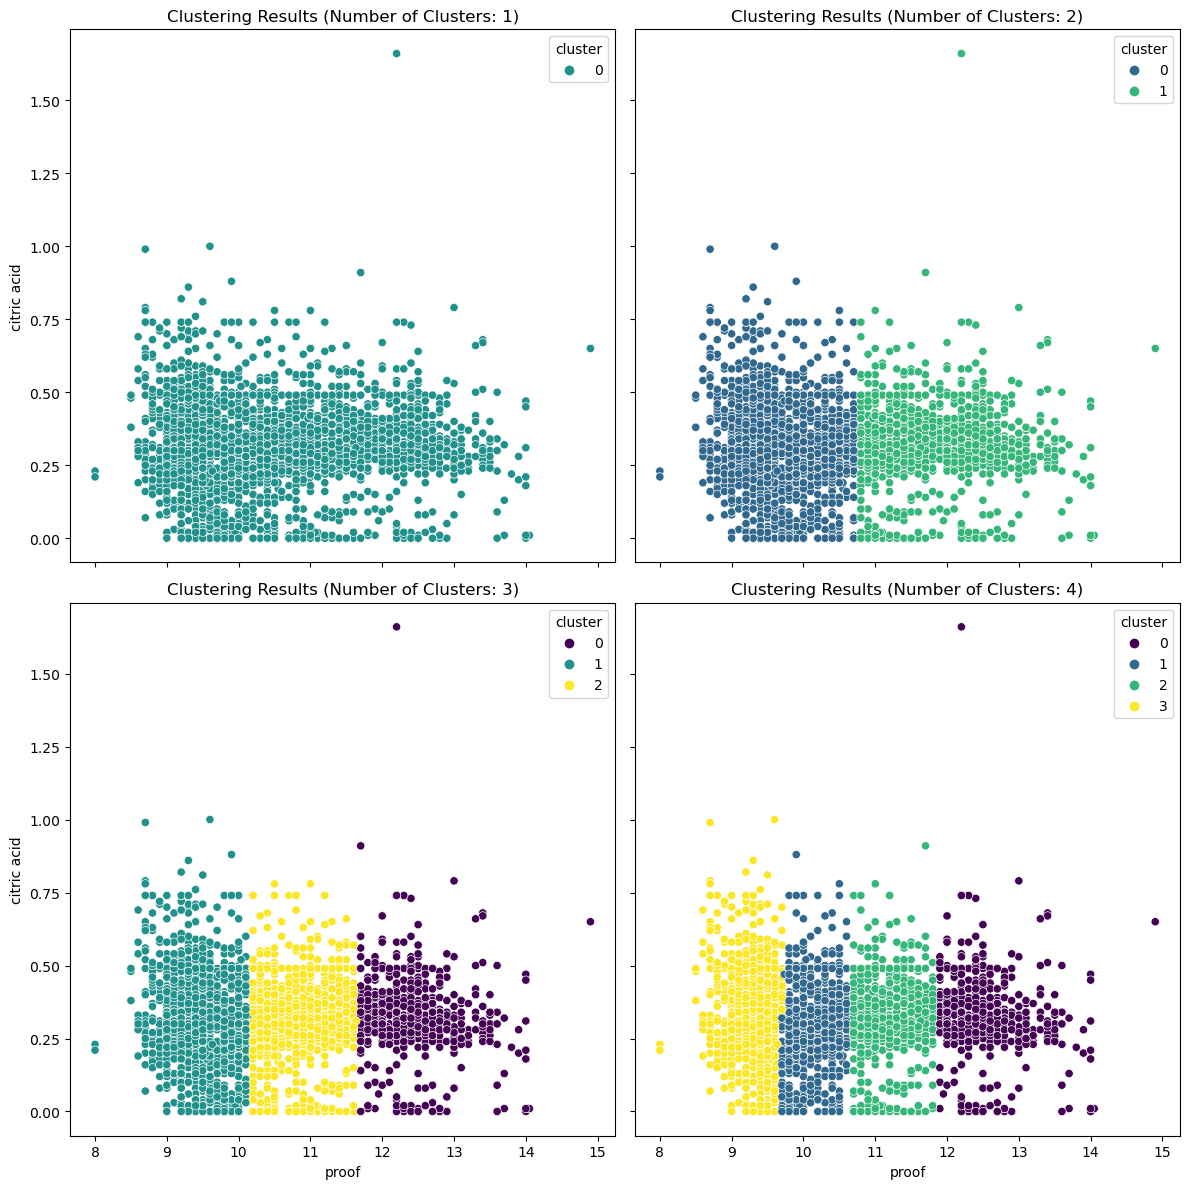

In [83]:
# Create subplots with col_wrap
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharex=True, sharey=True)

for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)

    cluster_labels = kmeans.predict(X)

    train_clustered = train.copy()
    train_clustered['cluster'] = cluster_labels

    row = (k - 1) // 2  # Calculate row index (0 or 1)
    col = (k - 1) % 2   # Calculate column index (0 or 1)

    # Use the appropriate axis for each subplot
    ax = axes[row, col]

    sns.scatterplot(data=train_clustered, x='proof', y='citric acid', hue='cluster', palette='viridis', ax=ax)
    ax.set_xlabel('proof')
    ax.set_ylabel('citric acid')
    ax.set_title(f'Clustering Results (Number of Clusters: {k})')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()


**The K-Means algorithm was able to successfully cluster the wine features into four distinct groups based on their proof and citric acid levels. These groups are:**

- **Cluster 0** contains wines with low proof and low citric acid levels, and they are associated with a certain average quality rating. This suggests that wines with these specific characteristics tend to have a certain quality profile.
- **Cluster 1** contains wines with high proof and high citric acid levels, and they are associated with a different average quality rating. This indicates that wines with these characteristics have a different quality profile compared to Cluster 0.
- **Cluster 2** represents wines with intermediate levels of proof and citric acid, and they are associated with yet another average quality rating. This allows us to understand how wines with balanced characteristics might relate to quality.
- **Cluster 3** contains wines with low proof and high citric acid levels, and they are associated with a particular average quality rating. This tells us how wines with sweet and fruity attributes might fare in terms of quality.





## Elbow Method

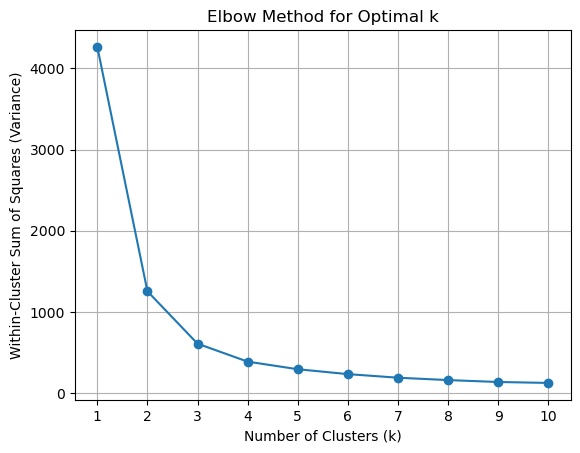

In [37]:
scaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(X)

    scaled_cluster_variances.append(kmeans.inertia_)

plt.plot(range(1, 11), scaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

- K=3 is the optimal k-value based of the elbow method and the cluster scatterplots above


## Repeat clustering with 3 different features

In [ ]:
X = train[['proof', 'citric acid', 'free sulfur dioxide']]

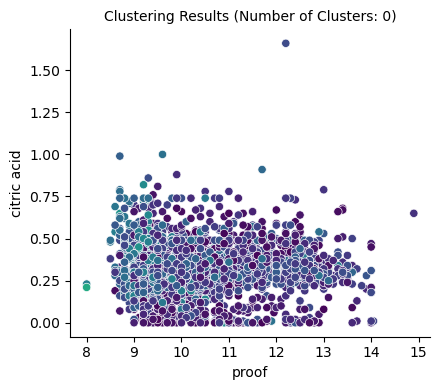

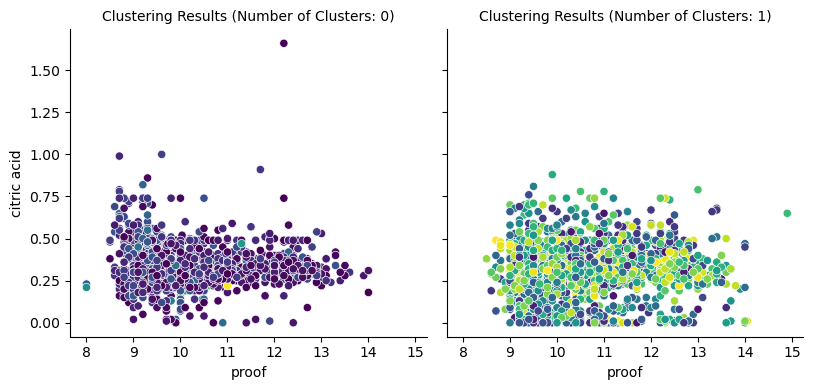

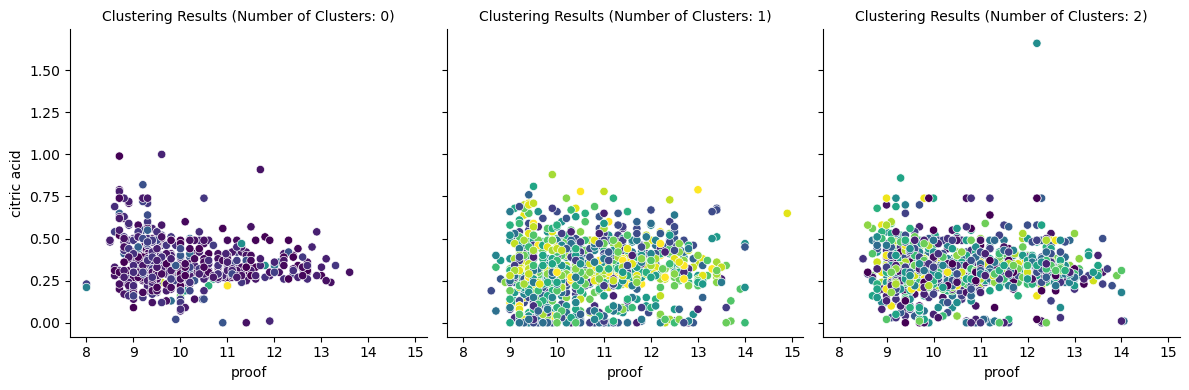

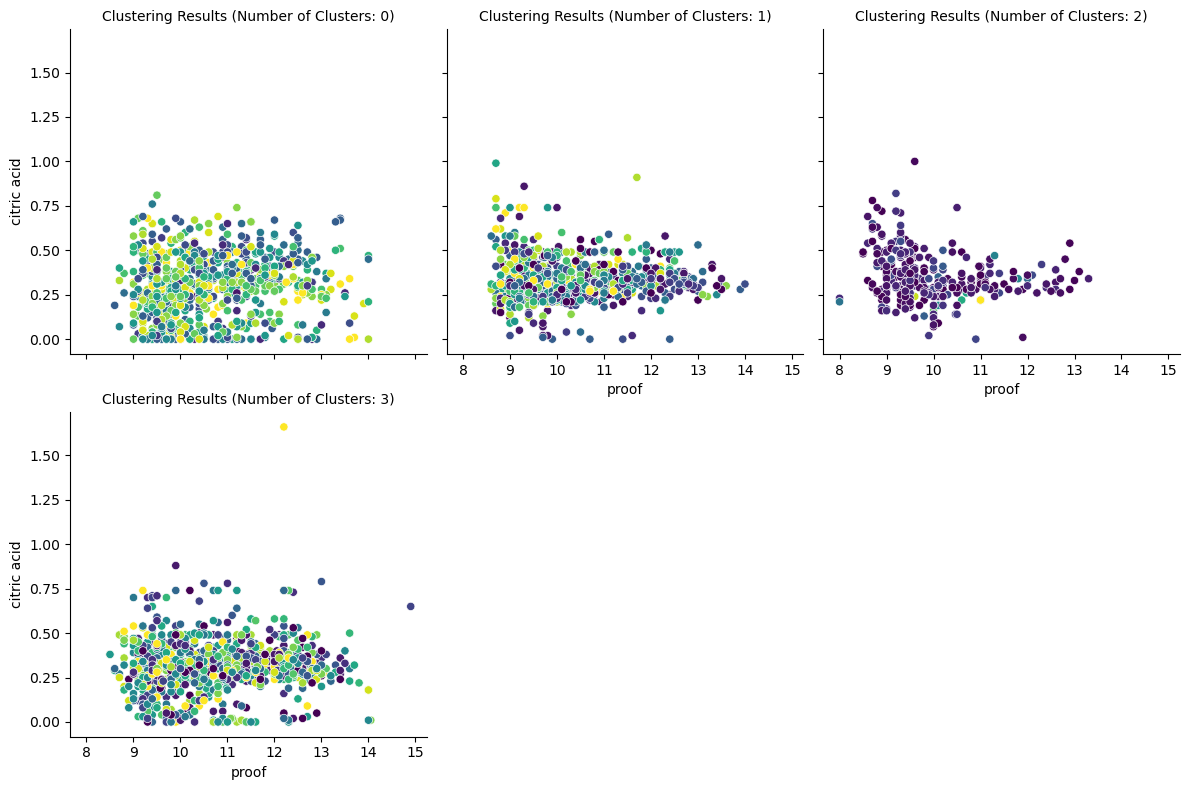

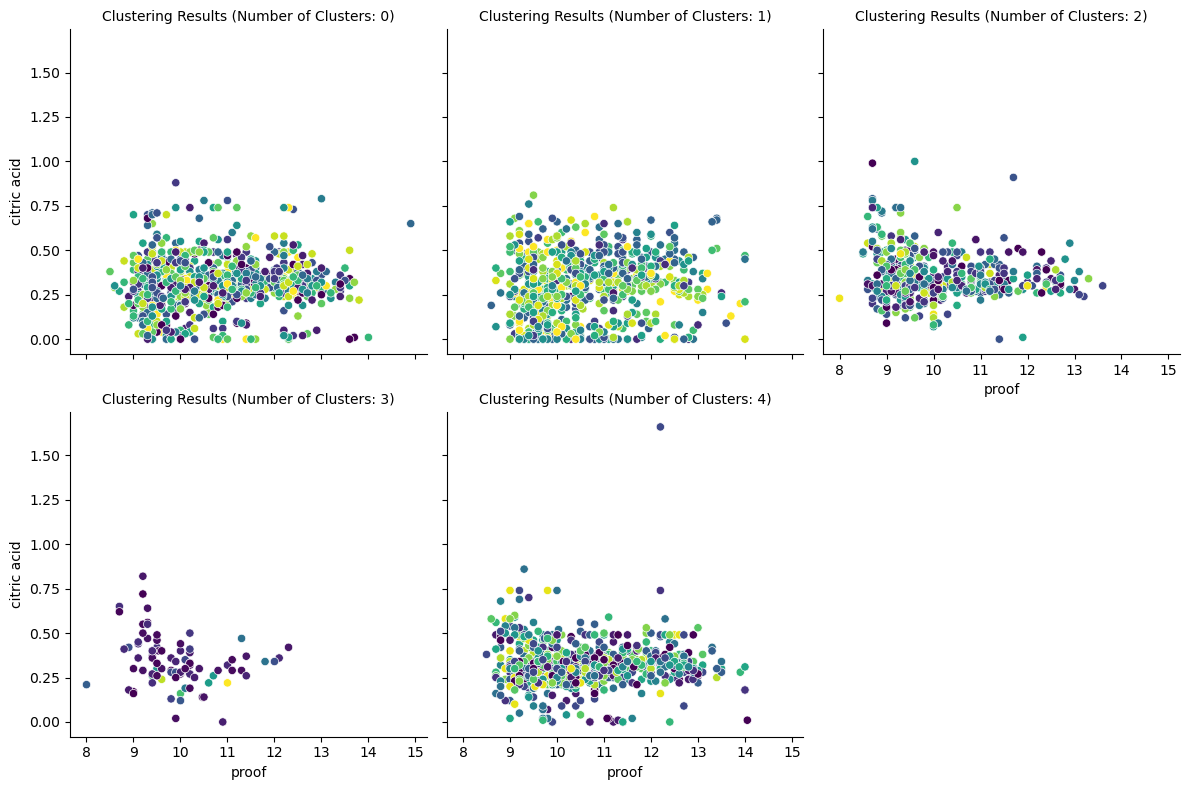

In [84]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)

    cluster_labels = kmeans.predict(X)

    train_clustered = train.copy()
    train_clustered['cluster'] = cluster_labels

    g = sns.FacetGrid(train_clustered, col='cluster', col_wrap=3, height=4)
    g.map_dataframe(sns.scatterplot, x='proof', y='citric acid', hue='free sulfur dioxide', palette='viridis')
    g.set_axis_labels('proof', 'citric acid')
    g.set_titles('Clustering Results (Number of Clusters: {col_name})')
    plt.show()

# Elbow Method

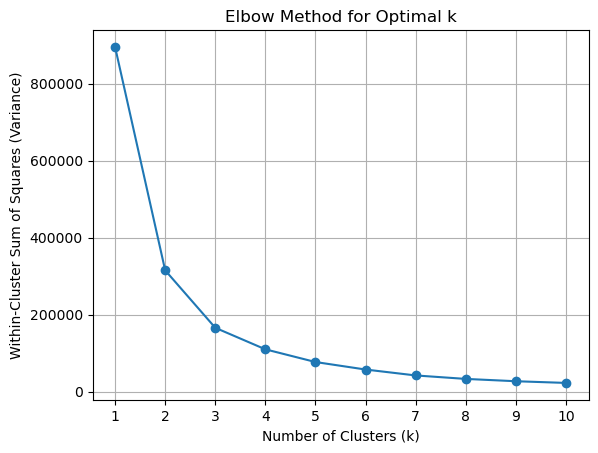

In [40]:
scaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(X)

    scaled_cluster_variances.append(kmeans.inertia_)

plt.plot(range(1, 11), scaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

- K=3 is the optimal k-value based of the elbow method and the cluster scatterplots above


## Exploration Summary


- The three features, "proof," "citric acid," and "free sulfur dioxide," were identified as significant drivers of wine quality.
- It is advisable to explore data with a more reasonable number of features, considering stronger correlations with the target variable.
- The feautures were found to influence wine quality positively.
- Features moving forward for modeling are: "Proof," "Citric Acid," and "Free Sulfur Dioxide."
- All columns were found to be drivers of the quality


## Feature modeling

- Proof will be moving forward.
- Citric acid will be moving forward.
- Free sulfur dioxide will be moving forward.


## Modeling

- We will use accuracy as the evaluation metric
- By predicting quality for every wine, one could achieve an accuracy of 45%. 
- 45% will be the baseline accuracy we use for this project
- We will be evaluating top 3 models developed out of 36 different classification models.
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data
- Data for split will be scaled.

In [18]:
k_values = [3, 4, 5, 6]

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=123)
    

    train[f'cluster_k{k}'] = kmeans.fit_predict(train.drop(columns=['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality', 'strain', 'quality_bin',
       'strain_red', 'strain_white'],))

### Baseline

In [19]:
majority_class = train['quality'].value_counts().idxmax()
majority_count = train['quality'].value_counts().max()


total_instances = len(train['quality_bin'])


baseline_accuracy = majority_count / total_instances

results_df = pd.DataFrame(columns=['Cluster_Column', 'Train_Accuracy', 'Validation_Accuracy'])
results_df = results_df.append({'Cluster_Column': 'Baseline',
                                'Train_Accuracy': baseline_accuracy,
                                'Validation_Accuracy':'n/a',
                               'Score_Diff': 0},
                               ignore_index=True)

In [20]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.0


### 3 Feature LogisticRegression (LogReg)

In [21]:
X = train[['proof', 'citric acid','free sulfur dioxide']]
y = train['quality']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)



results_df = results_df.append({'Cluster_Column': '3 feature LogReg',
                                'Train_Accuracy': train_accuracy,
                                'Validation_Accuracy': val_accuracy,
                               'Score_Diff': abs(round(train_accuracy - val_accuracy, 2))},
                               ignore_index=True)

In [22]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.00
1,3 feature LogReg,0.530424,0.521812,0.01


### cluster_k6 with proof, free sulfur dioxide, citric acid LogReg

In [23]:

X = train[['proof', 'citric acid','free sulfur dioxide', 'cluster_k6']]
y = train['quality']

   
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

results_df = results_df.append({'Cluster_Column': 'cluster_k6 with proof, free sulfur dioxide, citric acid LogReg',
                                    'Train_Accuracy': train_accuracy,
                                    'Validation_Accuracy': val_accuracy,
                                   'Score_Diff': abs(round(train_accuracy - val_accuracy, 2))},
                                   ignore_index=True)

In [25]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.00
1,3 feature LogReg,0.530424,0.521812,0.01
2,"cluster_k6 with proof, free sulfur dioxide, citric acid LogReg",0.528745,0.525168,0.00


### cluster_k5 with proof, free sulfur dioxide, citric acid LogReg

In [26]:

X = train[['proof', 'citric acid','free sulfur dioxide', 'cluster_k5']]
y = train['quality']

   
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

results_df = results_df.append({'Cluster_Column': 'cluster_k5 with proof, free sulfur dioxide, citric acid LogReg',
                                    'Train_Accuracy': train_accuracy,
                                    'Validation_Accuracy': val_accuracy,
                                   'Score_Diff': abs(round(train_accuracy - val_accuracy, 2))},
                                   ignore_index=True)

In [27]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.00
1,3 feature LogReg,0.530424,0.521812,0.01
2,"cluster_k6 with proof, free sulfur dioxide, citric acid LogReg",0.528745,0.525168,0.00
3,"cluster_k5 with proof, free sulfur dioxide, citric acid LogReg",0.529165,0.526846,0.00


# Comparing Models

- Based on the information provided, it seems that the The 3 Feature Logistic Regression model has the highest accuracy with lowest amount of features at 52% validation accuracy , which is 7% better than baseline. 
- On the other hand, the "cluster_k6 with proof, free sulfur dioxide, citric acid LogReg" model had the same validate score but included an additional cluster feature.
- The "cluster_k5 with proof, free sulfur dioxide, citric acid LogReg model" also had an additional feature with the same validate score.
- Considering all models, as they did all beat baseline, the 3 Feature LogReg model was picked as most optimal as it contained the lowest amount of features for the same scoring outputs.


In [28]:
X = train[['proof', 'citric acid','free sulfur dioxide']]
y = train['quality']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(random_state = 123)  
model.fit(X_train_scaled, y_train)



y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Step 7: Print the training and validation accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


X_test = test[['proof', 'citric acid', 'free sulfur dioxide']]
y_test = test['quality']
X_test_scaled = scaler.transform(X_test)

y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5304238355014688
Validation Accuracy: 0.5218120805369127
Test Accuracy: 0.5028195488721805


### Modeling Summary
- All models performed better than baseline
- Test score for 3 Feature Logistic Regression was 50% which is 5% higher than baseline.
- 3 Feature LogisticRegression was used as it contained less features and same output

## Recommendations

- Based on the analysis, it is highly recommended to utilize the three-feature model. This model demonstrated a significant improvement over the baseline by achieving a 5% higher accuracy rate.
- Furthermore, it is advisable to conduct further investigation by incorporating additional features into the three-feature model. There is a potential for these additional features to enhance the overall accuracy and performance of the model.
- In particular, we strongly recommend exploring the "ph" feature in future analyses, as it appears to hold significant promise in contributing to the model's effectiveness. By incorporating the "ph" feature, we anticipate achieving even better results in our predictive capabilities.
- The three-feature model has proven its superiority over the baseline, and it is crucial to continue exploring and experimenting with other features, especially the "ph" feature, to further enhance the model's accuracy and predictive power.



## Conclusions

- In summary, all the models demonstrated superior performance compared to the baseline. However, the 3 Feature LogReg model was chosen as the most optimal due to its ability to achieve competitive accuracy with the fewest number of features, which can be advantageous in terms of simplicity, interpretability, and computational efficiency.
- This project successfully identified the key drivers of wine quality and developed a high-performing predictive model.
- Understanding and leveraging the impact of alcohol content(proof),free sulfer dioxide, and citric acid levels, winemakers can make informed decisions to enhance the quality of their wines. 
- The findings from this project offer valuable insights for the wine industry and open avenues for further exploration and analysis of other factors that influence wine quality

## Reproduce

- Install necessary python packages.
- Clone the wine_clustering_project repository.
- Download files from https://data.world/food/wine-quality
- Unzip and store the  csv files in the wine_clustering_project folder.
- Ensure the wrangle.py, explore.py and model.py files are in the same folder as the wine_final_report.ipynb notebook.


# Sources


1. Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553. Retrieved from http://dx.doi.org/10.1016/j.dss.2009.05.016.

2. Preda, C., Lopes, G. R. V. D., & Rodrigues, L. M. C. (2009). Wine Quality Data Set. data.world. Retrieved from https://data.world/food/wine-quality.



